<a href="https://colab.research.google.com/github/DivyanshRana1515/DL_Lab_500121856_Divyansh/blob/main/Exp_12_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.metrics import structural_similarity as ssim
import math

In [ ]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize to range 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Add channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train = np.clip(x_train, 0, 1)
x_test = np.clip(x_test, 0, 1)
print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28, 1)
Testing data: (10000, 28, 28, 1)


In [ ]:

# Encoder
input_img = layers.Input((28,28,1))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2))(x)

# Decoder
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 167s 391ms/step - loss: 0.1866 - val_loss: 0.0749
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 163s 386ms/step - loss: 0.0730 - val_loss: 0.0710
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 201s 385ms/step - loss: 0.0700 - val_loss: 0.0694
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 205s 392ms/step - loss: 0.0687 - val_loss: 0.0685
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 162s 384ms/step - loss: 0.0677 - val_loss: 0.0676
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 162s 384ms/step - loss: 0.0670 - val_loss: 0.0672
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 164s 388ms/step - loss: 0.0664 - val_loss: 0.0667
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 205s 395ms/step - loss: 0.0659 - val_loss: 0.0661
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 196s 380ms/step - loss: 0.0656 - val_loss: 0.0658
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 202s 381ms/step - loss: 0.0652 - val_loss: 0.0655


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


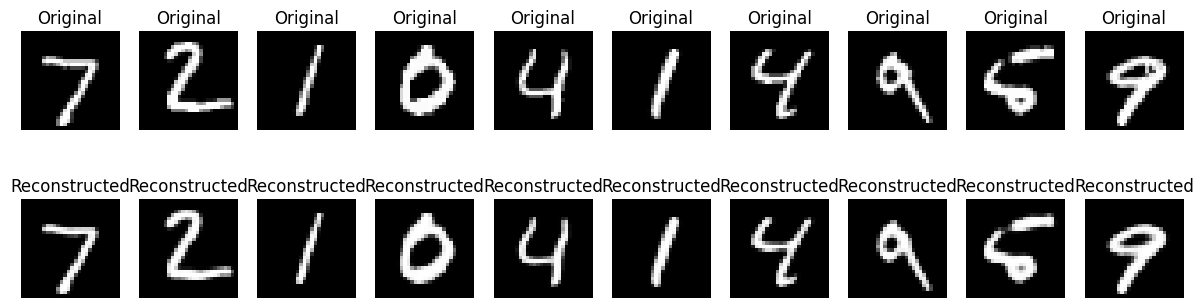

In [ ]:
decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(15,4))
for i in range(10):

    # Original
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, 10, 10+i+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

In [ ]:
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

mse_scores = [mse(x_test[i], decoded_imgs[i]) for i in range(10)]
print("Average MSE on 10 samples:", np.mean(mse_scores))

Average MSE on 10 samples: 0.0013438958


In [ ]:
def psnr(img1, img2):
    mse_val = mse(img1, img2)
    if mse_val == 0:
        return 100
    return 20 * math.log10(1.0 / math.sqrt(mse_val))

# Use only 10 samples
psnr_scores = [psnr(x_test[i], decoded_imgs[i]) for i in range(10)]

print("Average PSNR on 10 samples:", np.mean(psnr_scores))

Average PSNR on 10 samples: 29.45378322320417


In [ ]:
ssim_scores = []

for i in range(10):  # exactly 10 samples
    score = ssim(
        x_test[i].reshape(28, 28),
        decoded_imgs[i].reshape(28, 28),
        data_range=1.0
    )
    ssim_scores.append(score)

print("Average SSIM on 10 samples:", np.mean(ssim_scores))

Average SSIM on 10 samples: 0.9874142246982774
